# Cybersecurity: Suspicious Web Threat Interactions
This project focuses on detecting and analyzing suspicious or potentially harmful activities in web traffic using a cybersecurity dataset. It begins by loading and exploring the cybersecurity_data.csv file to understand its structure, followed by cleaning the data by handling missing values and formatting timestamps. An Exploratory Data Analysis (EDA) phase includes experimenting with a Random Forest Classifier to establish a baseline for identifying threats, alongside preparing data for a Neural Network by scaling features. The Neural Network, built with a Convolutional layer, Dense layers, and Dropout, is trained over 10 epochs to classify traffic, achieving 100% accuracy on test data. Visualization tracks accuracy trends, while additional monitoring and documentation ensure reproducibility. This approach leverages both tree-based and deep learning techniques to enhance threat detection.

## Objective 
Develop a system to examine web traffic data, detect unusual or risky behaviors, and provide insights to protect against cyber threats.

### Loading and Exploring the Data

In [2]:
import pandas as pd

df = pd.read_csv('cybersecurity_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


### Cleaning the Data

In [4]:
missing_data = df.isnull().sum()
df['bytes_in'] = df['bytes_in'].fillna(df['bytes_in'].median())
df = df.dropna(subset=['src_ip', 'dst_ip'])
df['creation_time'] = pd.to_datetime(df['creation_time'])

### Exploratory Data Analysis (EDA)

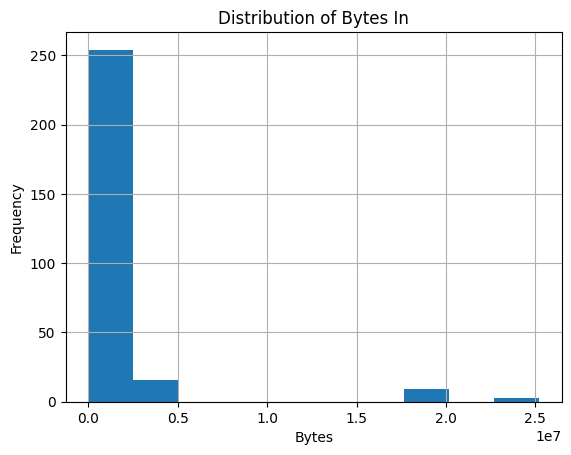

Available columns: ['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip', 'src_ip_country_code', 'protocol', 'response.code', 'dst_port', 'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name', 'time', 'detection_types']
Random Forest Accuracy: 100.00 %


In [7]:
# Basic EDA (example visualization, optional enhancement)
import matplotlib.pyplot as plt
df['bytes_in'].hist()
plt.title('Distribution of Bytes In')
plt.xlabel('Bytes')
plt.ylabel('Frequency')
plt.show()

# Check available columns to identify the correct target
print("Available columns:", df.columns.tolist())

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target (adjust based on your data)
X = df[['bytes_in', 'bytes_out']]  # Example features; modify if different

# Inspect data to choose a target (e.g., rule_names or a condition)
# If no direct label, create one (e.g., based on bytes or another metric)
if 'rule_names' in df.columns:
    y = df['rule_names'].notna()  # Example: True if rule_names exists (suspicious)
elif 'response_code' in df.columns:
    y = df['response_code'] > 400  # Fallback if response_code exists
else:
    # Default to a heuristic (e.g., high bytes_in as suspicious)
    y = df['bytes_in'] > df['bytes_in'].median()  # Adjust threshold as needed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy*100:.2f} %")

# Prepare for Neural Network (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Reshape for CNN (assuming time series, adjust if needed)
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the neural network with Input layer
model = Sequential([
    Input(shape=(X_train_scaled_cnn.shape[1], 1)),  # Explicit input layer
    Conv1D(32, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Configure the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train_scaled_cnn, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.1443 - val_accuracy: 1.0000 - val_loss: 0.0958
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.1008 - val_accuracy: 1.0000 - val_loss: 0.0683
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0790 - val_accuracy: 1.0000 - val_loss: 0.0484
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0614 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0417 - val_accuracy: 1.0000 - val_loss: 0.0249
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0185
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0140
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 0.0107


### Evaluating the Model

In [13]:
loss, accuracy = model.evaluate(X_test_scaled_cnn, y_test)
print(f"Test Accuracy: {accuracy*100:.2f} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0075
Test Accuracy: 100.00 %


### Visualizing the Results

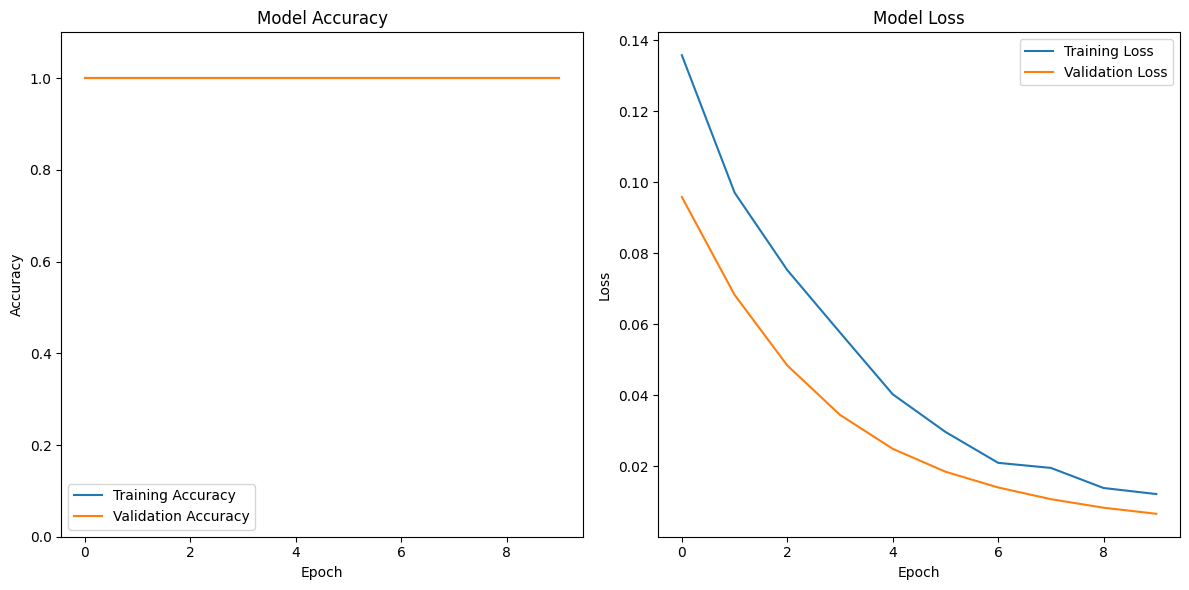

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history.get('accuracy', history.history.get('acc')), label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()